image path:
(181, 230)


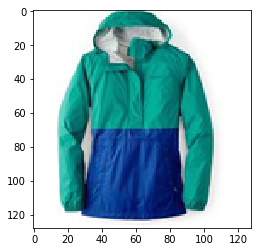

(128, 128)


/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:40: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/anaconda/envs/py35/lib/python3.5/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


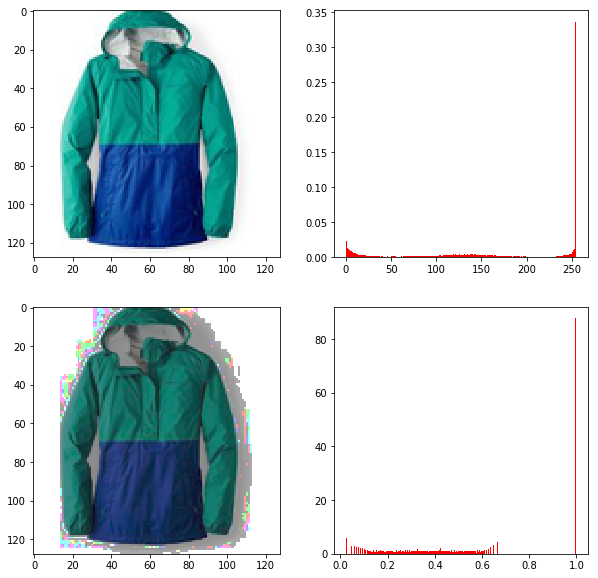

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:59: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


In [28]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import data,exposure
import numpy as np
import scipy.misc
import os


def Padding(im):
    desired_size = 128

    old_size = im.size  # old_size[0] is in (width, height) format

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    # use thumbnail() or resize() method to resize the input image

    # thumbnail is a in-place operation

    # im.thumbnail(new_size, Image.ANTIALIAS)

    im = im.resize(new_size, Image.ANTIALIAS)
    # create a new image and paste the resized on it

    new_im = Image.new("RGB", (desired_size, desired_size),(255,255,255))
    new_im.paste(im, ((desired_size-new_size[0])//2,
                        (desired_size-new_size[1])//2))

    # new_im.show()
#     imgplot = plt.imshow(new_im)
#     print(old_size)
    delta_w = desired_size - new_size[0]
    delta_h = desired_size - new_size[1]
    padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
    new_im = ImageOps.expand(im, padding,(255,255,255))
#     plt.show(new_im)
#     print(new_im.size)
    img = np.array(new_im)
    scipy.misc.imsave('padding.jpg', img)

def Equalize(im):
    img = np.array(im)
#     plt.figure("hist",figsize=(10,10))
#     arr=img.flatten()
#     plt.subplot(221)
#     plt.imshow(img)  
#     plt.subplot(222)
#     plt.hist(arr, bins=256, normed=1,edgecolor='None',facecolor='red') 

    img1=exposure.equalize_hist(img)
#     arr1=img1.flatten()
#     plt.subplot(223)
#     plt.imshow(img1)  
#     plt.subplot(224)
#     plt.hist(arr1, bins=256, normed=1,edgecolor='None',facecolor='red') 

#     plt.show()
    scipy.misc.imsave('equalize.jpg', img1)
    

im_pth = "/home/manyi/notebooks/manyi/gear_images"
out_pth = "/home/manyi/notebooks/manyi/gear_images_a"

def travel(orgpth, outpth):
    fs = os.listdir(orgpth)  
    for f in fs:
        tmp_path = os.path.join(orgpth, f)
    if not os.path.isdir(tmp_path):  
        print('do with file: %s'%tmp_path)
        img = processfile(tmp_path)
        img.save(os.path.join(outpth, f), 'JPEG')
    else:
        print('do with dir: %s'%tmp_path)
        outpth2 = os.path.join(outpth, f)
        os.mkdir(outpth2)
        travel(tmp_path, outpth2)

def processfile(im_pth):
    im = Image.open(im_pth)
    old_size = im.size  # old_size[0] is in (width, height) format
    newr = max(old_size)

    new_im = Image.new("RGB", (newr, newr), (255,255,255))
    new_im.paste(im, ((newr-old_size[0])//2, (newr-old_size[1])//2))

    im = new_im.resize((128, 128), Image.ANTIALIAS)
    im = ImageOps.autocontrast(im)

    return im

  

Padding(im)
Equalize(new_im)